# CRC Report

Data source: [Metabolic Profiling of Visceral and Subcutaneous Adipose Tissue from Colorectal  Patients: Unraveling the Link Between Adipose Tissue and Cancer biomarker study](https://doi.org/10.1371/journal.pone.0175133)

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2g}'.format)

In [2]:
from sklearn_utils.utils import SkUtilsIO, filter_by_label

X, y = SkUtilsIO('../datasets/CRC_analysis_with_std.json', gz=True).from_json()
X_visceral, y_visceral = filter_by_label(X, y, 'Subcutaenous Fat', reverse=True)

In [3]:
from metabolitics.preprocessing import MetaboliticsPipeline

pre = MetaboliticsPipeline([
    'reaction-diff', 
    'feature-selection', 
    'pathway-transformer', 
    'transport-pathway-elimination'
])

X_visceral_pathways = pre.fit_transform(X_visceral, y_visceral)

Number of healthy samples are so small thus only 2-fold test could be performed.

## Visceral Fat

In [4]:
from sklearn_utils.utils import feature_importance_report

df = feature_importance_report(X_visceral_pathways, y_visceral)

df['ref'] = ['[%d]' % (i + 1) if i < 10 else '-' for i in range(len(df))]

df

labels,Visceral Fat,healthy,F,pval,ref
Fatty acid oxidation,1.1e+03,-3.3e-14,1.1e+02,2e-13,[1]
Glyoxylate and dicarboxylate metabolism,-1.5e+03,-5.7e-14,99,1.1e-12,[2]
Arginine and Proline Metabolism,-1.9e+03,-7.6e-15,88,4.6e-12,[3]
Tryptophan metabolism,-1.2e+03,-1.1e-13,77,3.1e-11,[4]
Galactose metabolism,8.5e+02,9.5e-15,68,1.8e-10,[5]
Fructose and mannose metabolism,-1.8e+03,7.6e-14,50,1.3e-08,[6]
Glutathione metabolism,-1.6e+03,3.8e-14,44,4.6e-08,[7]
Purine catabolism,-1.5e+03,-5.7e-14,33,1.3e-06,[8]
Urea cycle,-1.7e+03,-1.3e-13,32,1.5e-06,[9]
Cholesterol metabolism,-9.8e+02,-9.5e-14,29,4e-06,[10]


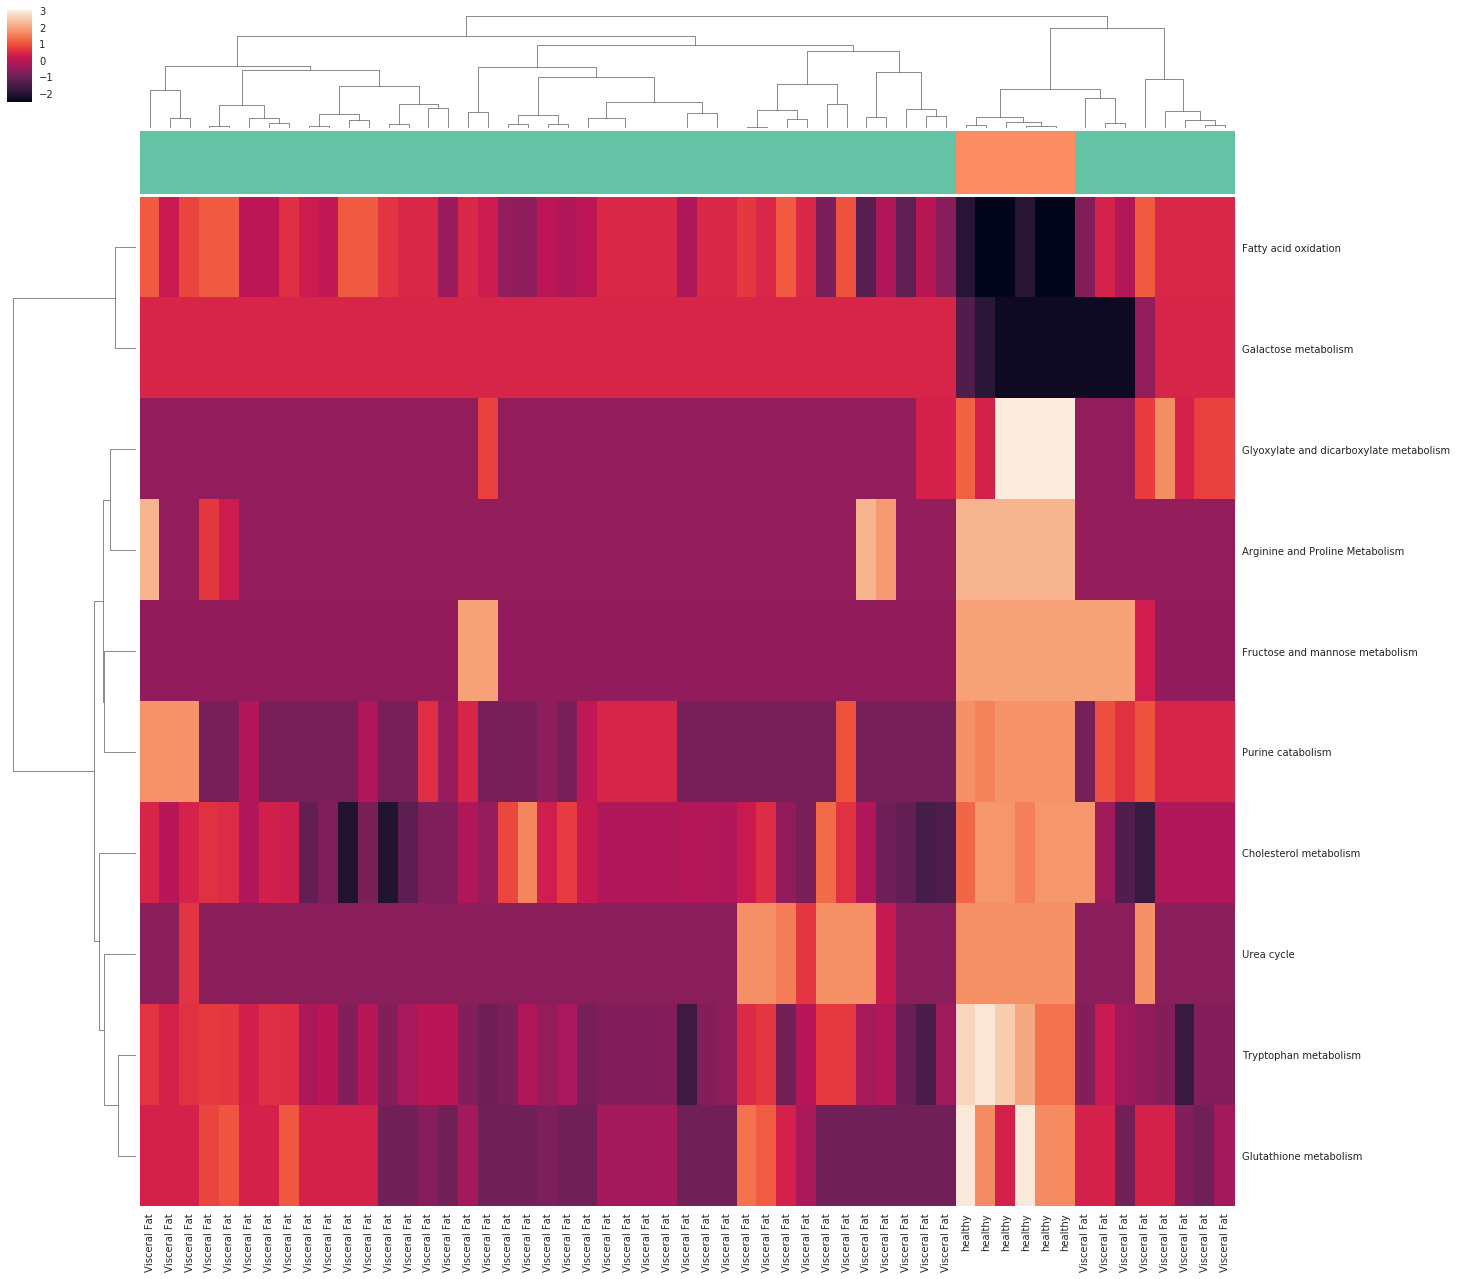

In [5]:
%matplotlib inline

from sklearn_utils.visualization import plot_heatmap

plot_heatmap(X_visceral_pathways, y_visceral)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
            ('dy', pre),
            ('vect', DictVectorizer(sparse=False)),
            ('pca', PCA()),
            ('clf', LogisticRegression(C=0.3e-6, random_state=43))
        ])

In [7]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kf = StratifiedKFold(n_splits=2, random_state=43)

pipe.named_steps['clf'].set_params(C=0.3e-6, penalty='l1')

scores = cross_val_score(pipe, X_visceral, y_visceral, cv=kf, scoring='f1_micro')

print('kfold test: %s' % scores)
print('mean: %s' % scores.mean().round(3))
print('std: %s' % scores.std().round(3))

kfold test: [0.89285714 0.88888889]
mean: 0.891
std: 0.002


## References

[1]

[2]

[3]

[4]

[5]

[6]

[7]

[8]

[9]

[10]